# TRAINING AND TESTING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

C:\Users\sahan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sahan\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\sahan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
data = pd.read_csv("../artifacts/data.csv")
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [18]:
from sklearn.preprocessing import StandardScaler
import pickle
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
with open("../artifacts/preprocessor.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Preprocessor (StandardScaler) saved as preprocessor.pkl")


Preprocessor (StandardScaler) saved as preprocessor.pkl


In [3]:
x = data.drop(columns = 'Outcome')
y = data['Outcome']
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [4]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


In [17]:
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)
os.makedirs("../artifacts", exist_ok=True)
train_data.to_csv("../artifacts/train.csv", index=False)
test_data.to_csv("../artifacts/test.csv", index=False)

print("train.csv and test.csv saved successfully in artifacts/")

train.csv and test.csv saved successfully in artifacts/


#  Logistic Regression

In [5]:
X = data.drop(columns=['Outcome', 'AgeGroup'])
y = data['Outcome']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (614, 8)
Test shape: (154, 8)


In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
y_pred = log_reg.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 70.12987012987013

Confusion Matrix:
 [[81 19]
 [27 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [10]:
print("Training Accuracy:", log_reg.score(x_train, y_train) * 100)

Training Accuracy: 79.31596091205212


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),  # You can also try 'rbf'
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred) * 100
    results[name] = acc
    print(f"\n {name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



 Logistic Regression
Accuracy: 70.12987012987013
Confusion Matrix:
 [[81 19]
 [27 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154


 SVM
Accuracy: 69.48051948051948
Confusion Matrix:
 [[81 19]
 [28 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154


 Random Forest
Accuracy: 77.92207792207793
Confusion Matrix:
 [[88 12]
 [22 32]]
Classification Report:
               precision    recal

In [12]:
print("\nModel Comparison (Accuracy Scores)")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.2f}%")


Model Comparison (Accuracy Scores)
Logistic Regression: 70.13%
SVM: 69.48%
Random Forest: 77.92%
KNN: 67.53%


In [13]:
best_model_name = max(results, key=results.get)
best_model_acc = results[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_acc:.2f}%")
best_model = models[best_model_name]
y_best_pred = best_model.predict(x_test)
print("\nDetailed Evaluation for Best Model:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_best_pred))
print("\nClassification Report:\n", classification_report(y_test, y_best_pred))


Best Model: Random Forest with Accuracy: 77.92%

Detailed Evaluation for Best Model:
Confusion Matrix:
 [[88 12]
 [22 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



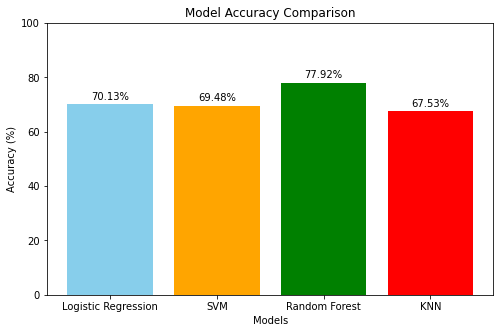

In [14]:
model_names = list(results.keys())
accuracies = list(results.values())
plt.figure(figsize=(8,5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 100)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%", ha='center', va='bottom')
plt.show()

In [15]:
input_df = pd.DataFrame({
    'Pregnancies': [2],
    'Glucose': [120],
    'BloodPressure': [70],
    'SkinThickness': [30],
    'Insulin': [100],
    'BMI': [28.5],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [30]
})

# Use the trained best model
result = best_model.predict_proba(input_df)
no_diabetes = result[0][0]
diabetes = result[0][1]

print("Probability of NO Diabetes:", round(no_diabetes * 100, 2), "%")
print("Probability of Diabetes:", round(diabetes * 100, 2), "%")


Probability of NO Diabetes: 79.0 %
Probability of Diabetes: 21.0 %


In [19]:
import pickle
with open("../artifacts/model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"Best model ({best_model_name}) saved as model.pkl")


Best model (Random Forest) saved as model.pkl
